In [17]:
from src.get_data import *
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Getting data for NFL Players dataframe, modifying some of the code from my capstone two which used NBA data

In [9]:
pd.set_option('display.max_columns', None)

In [18]:
player = Player('RodgAa00')
player_df = player.dataframe
player_df

,adjusted_net_yards_per_attempt_index,adjusted_net_yards_per_pass_attempt,adjusted_yards_per_attempt,adjusted_yards_per_attempt_index,all_purpose_yards,approximate_value,assists_on_tackles,attempted_passes,birth_date,blocked_punts,catch_percentage,completed_passes,completion_percentage_index,espn_qbr,extra_point_percentage,extra_points_attempted,extra_points_made,field_goal_percentage,field_goals_attempted,field_goals_made,fifty_plus_yard_field_goal_attempts,fifty_plus_yard_field_goals_made,fourth_quarter_comebacks,fourty_to_fourty_nine_yard_field_goal_attempts,fourty_to_fourty_nine_yard_field_goals_made,fumbles,fumbles_forced,fumbles_recovered,fumbles_recovered_for_touchdown,game_winning_drives,games,games_started,height,interception_percentage,interception_percentage_index,interceptions,interceptions_returned_for_touchdown,interceptions_thrown,kickoff_return_touchdown,kickoff_return_yards,kickoff_returns,less_than_nineteen_yards_field_goal_attempts,less_than_nineteen_yards_field_goals_made,longest_field_goal_made,longest_interception_return,longest_kickoff_return,longest_pass,longest_punt,longest_punt_return,longest_reception,longest_rush,name,net_yards_per_attempt_index,net_yards_per_pass_attempt,passer_rating_index,passes_defended,passing_completion,passing_touchdown_percentage,passing_touchdowns,passing_yards,passing_yards_per_attempt,player_id,position,punt_return_touchdown,punt_return_yards,punt_returns,punts,qb_record,quarterback_rating,receiving_touchdowns,receiving_yards,receiving_yards_per_game,receiving_yards_per_reception,receptions,receptions_per_game,rush_attempts,rush_attempts_per_game,rush_touchdowns,rush_yards,rush_yards_per_attempt,rush_yards_per_game,rushing_and_receiving_touchdowns,sack_percentage,sack_percentage_index,sacks,safeties,season,tackles,team_abbreviation,thirty_to_thirty_nine_yard_field_goal_attempts,thirty_to_thirty_nine_yard_field_goals_made,times_pass_target,times_sacked,total_punt_yards,touchdown_percentage_index,touches,twenty_to_twenty_nine_yard_field_goal_attempts,twenty_to_twenty_nine_yard_field_goals_made,weight,yards_from_scrimmage,yards_lost_to_sacks,yards_per_attempt_index,yards_per_completed_pass,yards_per_game_played,yards_per_kickoff_return,yards_per_punt,yards_per_punt_return,yards_per_touch,yards_recovered_from_fumble,yards_returned_from_interception
2005,NaN,-0.42,1.3,NaN,None,0,None,16,1983-12-02,None,NaN,9,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,2,0.0,0.0,0.0,NaN,3,0,6-2,6.3,NaN,None,None,1,None,None,None,None,None,None,None,None,16,None,None,NaN,8,Aaron Rodgers,NaN,1.95,NaN,None,56.3,0.0,0,65,4.1,RodgAa00,,None,None,None,None,,39.8,NaN,NaN,NaN,NaN,NaN,NaN,2,0.7,0,7,3.5,2.3,0,None,NaN,0.0,None,2005,None,GNB,None,None,NaN,3,None,NaN,2,None,None,225,7,28,NaN,7.2,21.7,None,None,None,3.5,0.0,None
2006,NaN,1.56,3.1,NaN,None,0,None,15,1983-12-02,None,NaN,6,NaN,7.9,None,None,None,None,None,None,None,None,NaN,None,None,1,0.0,0.0,0.0,NaN,2,0,6-2,0.0,NaN,None,None,0,None,None,None,None,None,None,None,None,16,None,None,NaN,6,Aaron Rodgers,NaN,1.56,NaN,None,40.0,0.0,0,46,3.1,RodgAa00,,None,None,None,None,,48.2,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,0,11,5.5,5.5,0,None,NaN,0.0,None,2006,None,GNB,None,None,NaN,3,None,NaN,2,None,None,225,11,18,NaN,7.7,23.0,None,None,None,5.5,0.0,None
2007,NaN,6.90,8.5,NaN,None,1,None,28,1983-12-02,None,NaN,20,NaN,78.8,None,None,None,None,None,None,None,None,NaN,None,None,0,NaN,NaN,NaN,NaN,2,0,6-2,0.0,NaN,None,None,0,None,None,None,None,None,None,None,None,43,None,None,NaN,13,Aaron Rodgers,NaN,6.26,NaN,None,71.4,3.6,1,218,7.8,RodgAa00,,None,None,None,None,,106.0,NaN,NaN,NaN,NaN,NaN,NaN,7,3.5,0,29,4.1,14.5,0,None,NaN,NaN,None,2007,None,GNB,None,None,NaN,3,None,NaN,7,None,None,225,29,24,NaN,10.9,109.0,None,None,None,4.1,NaN,None
2008,112.0,6.64,7.5,113.0,None,15,None,536,1983-12-02,None,NaN,341,108.0,62.9,None,None,None,None,None,None,None,None,1.0,None,None,10,0.0,5.0,-22.0,2.0,16,16,6-2,2.4,108.0,None,None,13,None,None,None,None,None,None,None,

In [20]:
player_df['birth_date'] =  pd.to_datetime(player_df['birth_date'], format='%Y-%m-%d')
player_df['birth_date']

2005     1983-12-02
2006     1983-12-02
2007     1983-12-02
2008     1983-12-02
2009     1983-12-02
2010     1983-12-02
2011     1983-12-02
2012     1983-12-02
2013     1983-12-02
2014     1983-12-02
2015     1983-12-02
2016     1983-12-02
2017     1983-12-02
2018     1983-12-02
2019     1983-12-02
2020     1983-12-02
Career   1983-12-02
Name: birth_date, dtype: datetime64[ns]

In [15]:
for i in list(player_df.columns):
    print(i)

adjusted_net_yards_per_attempt_index
adjusted_net_yards_per_pass_attempt
adjusted_yards_per_attempt
adjusted_yards_per_attempt_index
all_purpose_yards
approximate_value
assists_on_tackles
attempted_passes
birth_date
blocked_punts
catch_percentage
completed_passes
completion_percentage_index
espn_qbr
extra_point_percentage
extra_points_attempted
extra_points_made
field_goal_percentage
field_goals_attempted
field_goals_made
fifty_plus_yard_field_goal_attempts
fifty_plus_yard_field_goals_made
fourth_quarter_comebacks
fourty_to_fourty_nine_yard_field_goal_attempts
fourty_to_fourty_nine_yard_field_goals_made
fumbles
fumbles_forced
fumbles_recovered
fumbles_recovered_for_touchdown
game_winning_drives
games
games_started
height
interception_percentage
interception_percentage_index
interceptions
interceptions_returned_for_touchdown
interceptions_thrown
kickoff_return_touchdown
kickoff_return_yards
kickoff_returns
less_than_nineteen_yards_field_goal_attempts
less_than_nineteen_yards_field_goals

In [45]:
rodge_game = AbstractPlayer('RodgAa00', 'Aaron Rodgers', '202101240gnb')

# Getting Schedule Information

In [23]:
gb_sched = Schedule('GNB', 2020)

In [24]:
gb_sched.dataframe

,boxscore_index,date,datetime,day,extra_points_attempted,extra_points_made,field_goals_attempted,field_goals_made,fourth_down_attempts,fourth_down_conversions,interceptions,location,opponent_abbr,opponent_name,overtime,pass_attempts,pass_completion_rate,pass_completions,pass_touchdowns,pass_yards,pass_yards_per_attempt,points_allowed,points_scored,punt_yards,punts,quarterback_rating,result,rush_attempts,rush_touchdowns,rush_yards,rush_yards_per_attempt,third_down_attempts,third_down_conversions,time_of_possession,times_sacked,type,week,yards_lost_from_sacks
202009130min,202009130min,September 13,2020-09-13,Sun,5,5,2,2,2,1,0,Away,MIN,Minnesota Vikings,False,44,72.7,32,4,364,8.3,34,43,40,1,127.5,Win,32,1,158,4.9,11,6,41:16,0,Reg,1,0
202009200gnb,202009200gnb,September 20,2020-09-20,Sun,4,4,2,2,1,1,0,Home,DET,Detroit Lions,False,30,60.0,18,2,229,8.0,21,42,128,3,106.1,Win,35,2,259,7.4,12,6,34:46,1,Reg,2,11
202009270nor,202009270nor,September 27,2020-09-27,Sun,4,4,3,3,2,1,0,Away,NOR,New Orleans Saints,False,32,65.6,21,3,271,8.8,30,37,38,1,123.3,Win,26,1,98,3.8,11,5,31:40,1,Reg,3,12
202010050gnb,202010050gnb,October 5,2020-10-05,Mon,4,3,1,1,2,1,0,Home,ATL,Atlanta Falcons,False,33,81.8,27,4,315,9.9,16,30,81,2,146.0,Win,26,0,88,3.4,11,6,29:38,1,Reg,4,12
202010180tam,202010180tam,October 18,2020-10-18,Sun,1,1,1,1,0,0,2,Away,TAM,Tampa Bay Buccaneers,False,35,45.7,16,0,107,4.6,38,10,325,7,29.1,Loss,21,1,94,4.5,17,7,31:37,5,Reg,6,53
202010250htx,202010250htx,October 25,2020-10-25,Sun,5,5,0,0,0,0,0,Away,HTX,Houston Texans,False,34,67.6,23,4,283,8.3,20,35,207,5,132.4,Win,27,1,96,3.6,12,7,28:54,0,Reg,7,0
202011010gnb,202011010gnb,November 1,2020-11-01,Sun,2,2,0,0,5,3,0,Home,MIN,Minnesota Vikings,False,41,65.9,27,3,291,7.1,28,22,38,1,110.9,Loss,24,0,109,4.5,11,5,32:12,1,Reg,8,0
202011050sfo,202011050sfo,November 5,2020-11-05,Thu,4,4,2,2,1,1,0,Away,SFO,San Francisco 49ers,False,31,80.6,25,4,294,9.8,17,34,154,3,145.8,Win,31,0,111,3.6,12,6,36:30,1,Reg,9,11
202011150gnb,202011150gnb,November 15,2020-11-15,Sun,3,3,1,1,1,0,1,Home,JAX,Jacksonville Jaguars,False,34,70.6,24,2,315,9.6,20,24,215,5,106.9,Win,25,1,80,3.2,13,5,31:41,1,Reg,10,10
202011220clt,202011220clt,November 22,2020-11-22,Sun,4,4,1,1,1,0,1,Away,CLT,Indianapolis Colts,True,38,71.1,27,3,301,8.2,34,31,117,3,109.6,Loss,18,1,66,3.7,9,4,27:49,1,Reg,11,10


# Getting Boxscore Information

In [30]:
score = Boxscore('202101240gnb')
score_df = score.dataframe
score_df

,attendance,away_first_downs,away_fourth_down_attempts,away_fourth_down_conversions,away_fumbles,away_fumbles_lost,away_interceptions,away_net_pass_yards,away_pass_attempts,away_pass_completions,away_pass_touchdowns,away_pass_yards,away_penalties,away_points,away_rush_attempts,away_rush_touchdowns,away_rush_yards,away_third_down_attempts,away_third_down_conversions,away_time_of_possession,away_times_sacked,away_total_yards,away_turnovers,away_yards_from_penalties,away_yards_lost_from_sacks,date,duration,home_first_downs,home_fourth_down_attempts,home_fourth_down_conversions,home_fumbles,home_fumbles_lost,home_interceptions,home_net_pass_yards,home_pass_attempts,home_pass_completions,home_pass_touchdowns,home_pass_yards,home_penalties,home_points,home_rush_attempts,home_rush_touchdowns,home_rush_yards,home_third_down_attempts,home_third_down_conversions,home_time_of_possession,home_times_sacked,home_total_yards,home_turnovers,home_yards_from_penalties,home_yards_lost_from_sacks,losing_abbr,losing_name,stadium,time,winner,winning_abbr,winning_name
202101240gnb,7772,19,1,1,0,0,3,275,36,20,3,280,2,31,24,1,76,14,9,25:23,1,351,3,8,5,"Sunday Jan 24, 2021",3:14,23,0,0,2,1,1,314,48,33,3,346,4,26,16,0,67,14,8,34:37,5,381,2,30,32,GNB,Green Bay Packers,Lambeau Field,3:05pm,Away,TAM,Tampa Bay Buccaneers


In [31]:
for i in list(score_df.columns):
    print(i)

attendance
away_first_downs
away_fourth_down_attempts
away_fourth_down_conversions
away_fumbles
away_fumbles_lost
away_interceptions
away_net_pass_yards
away_pass_attempts
away_pass_completions
away_pass_touchdowns
away_pass_yards
away_penalties
away_points
away_rush_attempts
away_rush_touchdowns
away_rush_yards
away_third_down_attempts
away_third_down_conversions
away_time_of_possession
away_times_sacked
away_total_yards
away_turnovers
away_yards_from_penalties
away_yards_lost_from_sacks
date
duration
home_first_downs
home_fourth_down_attempts
home_fourth_down_conversions
home_fumbles
home_fumbles_lost
home_interceptions
home_net_pass_yards
home_pass_attempts
home_pass_completions
home_pass_touchdowns
home_pass_yards
home_penalties
home_points
home_rush_attempts
home_rush_touchdowns
home_rush_yards
home_third_down_attempts
home_third_down_conversions
home_time_of_possession
home_times_sacked
home_total_yards
home_turnovers
home_yards_from_penalties
home_yards_lost_from_sacks
losing_ab

# Getting Team Information

In [11]:
teams = Teams('2020')

In [12]:
teams.dataframes

,abbreviation,defensive_simple_rating_system,first_downs,first_downs_from_penalties,fumbles,games_played,interceptions,losses,margin_of_victory,name,offensive_simple_rating_system,pass_attempts,pass_completions,pass_first_downs,pass_net_yards_per_attempt,pass_touchdowns,pass_yards,penalties,percent_drives_with_points,percent_drives_with_turnovers,plays,points_against,points_contributed_by_offense,points_difference,points_for,post_season_result,rank,rush_attempts,rush_first_downs,rush_touchdowns,rush_yards,rush_yards_per_attempt,simple_rating_system,strength_of_schedule,turnovers,win_percentage,wins,yards,yards_from_penalties,yards_per_play
GNB,GNB,1.8,358,28,6,16,5,3,8.8,Green Bay Packers,5.9,526,372,216,7.5,48,4106,84,49.7,5.6,990,369,290.75,140,509,Lost Conference Championship,1,443,114,16,2118,4.8,7.7,-1.1,11,0.813,13,6224,684,6.3
BUF,BUF,0.6,397,38,11,16,11,3,7.9,Buffalo Bills,7.1,596,410,240,7.4,40,4620,102,49.4,11.8,1034,375,228.66,126,501,Lost Conference Championship,2,411,119,16,1723,4.2,7.7,-0.2,22,0.813,13,6343,941,6.1
TAM,TAM,2.8,364,44,5,16,12,5,8.6,Tampa Bay Buccaneers,6.5,626,410,238,7.1,42,4626,84,47.8,8.9,1017,355,246.24,137,492,Won Super Bowl,3,369,82,16,1519,4.1,9.4,0.8,17,0.688,11,6145,715,6.0
OTI,OTI,-3.1,381,36,5,16,7,5,3.3,Tennessee Titans,4.7,485,316,203,7.2,33,3653,86,47.9,7.2,1031,439,245.01,52,491,Lost WC,4,521,142,26,2690,5.2,1.6,-1.7,12,0.688,11,6343,783,6.2
NOR,NOR,4.5,367,21,9,16,8,4,9.1,New Orleans Saints,5.1,522,370,199,6.8,28,3758,98,45.5,9.0,1045,337,176.94,145,482,Lost Divisional,5,494,147,30,2265,4.6,9.6,0.5,17,0.750,12,6023,1005,5.8
KAN,KAN,2.3,397,32,9,16,7,2,6.9,Kansas City Chiefs,4.5,630,420,255,7.4,40,4854,105,47.9,9.2,1057,362,280.82,111,473,Lost Super Bowl,6,403,110,13,1799,4.5,6.8,-0.1,16,0.875,14,6653,919,6.3
RAV,RAV,4.3,327,19,7,16,11,5,10.3,Baltimore Ravens,3.9,406,257,142,6.3,27,2739,104,45.3,10.6,993,303,148.30,165,468,Lost Divisional,7,555,166,24,3071,5.5,8.3,-2.0,18,0.688,11,5810,961,5.9
SEA,SEA,0.7,356,29,5,16,13,4,5.5,Seattle Seahawks,4.8,563,388,216,6.5,40,3941,84,44.4,10.1,1022,371,129.24,88,459,Lost WC,8,411,111,15,1971,4.8,5.5,0.0,18,0.750,12,5912,662,5.8
CLT,CLT,1.6,364,34,4,16,11,5,5.6,Indianapolis Colts,1.2,552,371,201,7.1,24,4053,94,44.4,8.8,1032,362,168.41,89,451,Lost WC,9,459,129,20,1996,4.3,2.8,-2.8,15,0.688,11,6049,899,5.9
RAI,RAI,-4.9,359,32,16,16,10,8,-2.8,Las Vegas Raiders,2.9,551,369,206,7.3,28,4217,98,47.9,14.8,1036,478,147.62,-44,434,None,10,457,121,20,1916,4.2,-2.0,0.8,26,0.500,8,6133,856,5.9


In [15]:
green_bay = Roster('GNB', year=2020, slim=True)
green_bay

In [16]:
green_bay.players

{'AdamDa01': 'Davante Adams',
 'AdamMo00': 'Montravius Adams',
 'AlexJa00': 'Jaire Alexander',
 'AmosAd00': 'Adrian Amos',
 'AustTa00': 'Tavon Austin',
 'BakhDa00': 'David Bakhtiari',
 'BarnKr00': 'Krys Barnes',
 'BegeRe00': 'Reggie Begelton',
 'BlacHe00': 'Henry Black',
 'BoylTi00': 'Tim Boyle',
 'BradBe00': 'Ben Braden',
 'BradHu00': 'Hunter Bradley',
 'BurgJa01': 'James Burgess',
 'BurkOr00': 'Oren Burks',
 'ClarKe01': 'Kenny Clark',
 'CrosMa20': 'Mason Crosby',
 'DafnDo00': 'Dominique Dafney',
 'DeguJo00': 'Josiah Deguara',
 'DillAJ00': 'AJ Dillon',
 'ErviTy00': 'Tyler Ervin',
 'GaleTi01': 'Tipa Galeai',
 'GarvJo00': 'Jonathan Garvin',
 'GaryRa00': 'Rashan Gary',
 'GreeRa02': 'Raven Greene',
 'HarrDe10': "De'Jon Harris",
 'HarrDa03': 'Damon Harrison',
 'HollKa00': "Ka'dar Hollman",
 'JackJo01': 'Josh Jackson',
 'JenkEl00': 'Elgton Jenkins',
 'JoneAa00': 'Aaron Jones',
 'KekeKi00': 'Kingsley Keke',
 'KingKe01': 'Kevin King',
 'KirkCh00': 'Christian Kirksey',
 'LancTy00': 'Tyler Lanc

In [17]:
rodge = Player('RodgAa00')
rodge.

In [19]:
df_rodge = rodge.dataframe

In [31]:
df_rodge.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17 entries, ('2005',) to ('Career',)
Data columns (total 110 columns):
 #    Column                                          Non-Null Count  Dtype  
---   ------                                          --------------  -----  
 0    adjusted_net_yards_per_attempt_index            13 non-null     float64
 1    adjusted_net_yards_per_pass_attempt             17 non-null     float64
 2    adjusted_yards_per_attempt                      17 non-null     float64
 3    adjusted_yards_per_attempt_index                13 non-null     float64
 4    all_purpose_yards                               0 non-null      object 
 5    approximate_value                               17 non-null     int64  
 6    assists_on_tackles                              0 non-null      object 
 7    attempted_passes                                17 non-null     int64  
 8    birth_date                                      17 non-null     object 
 9    blocked_punts  

In [23]:
rodge_corr = df_rodge.corrwith()

<AxesSubplot:>

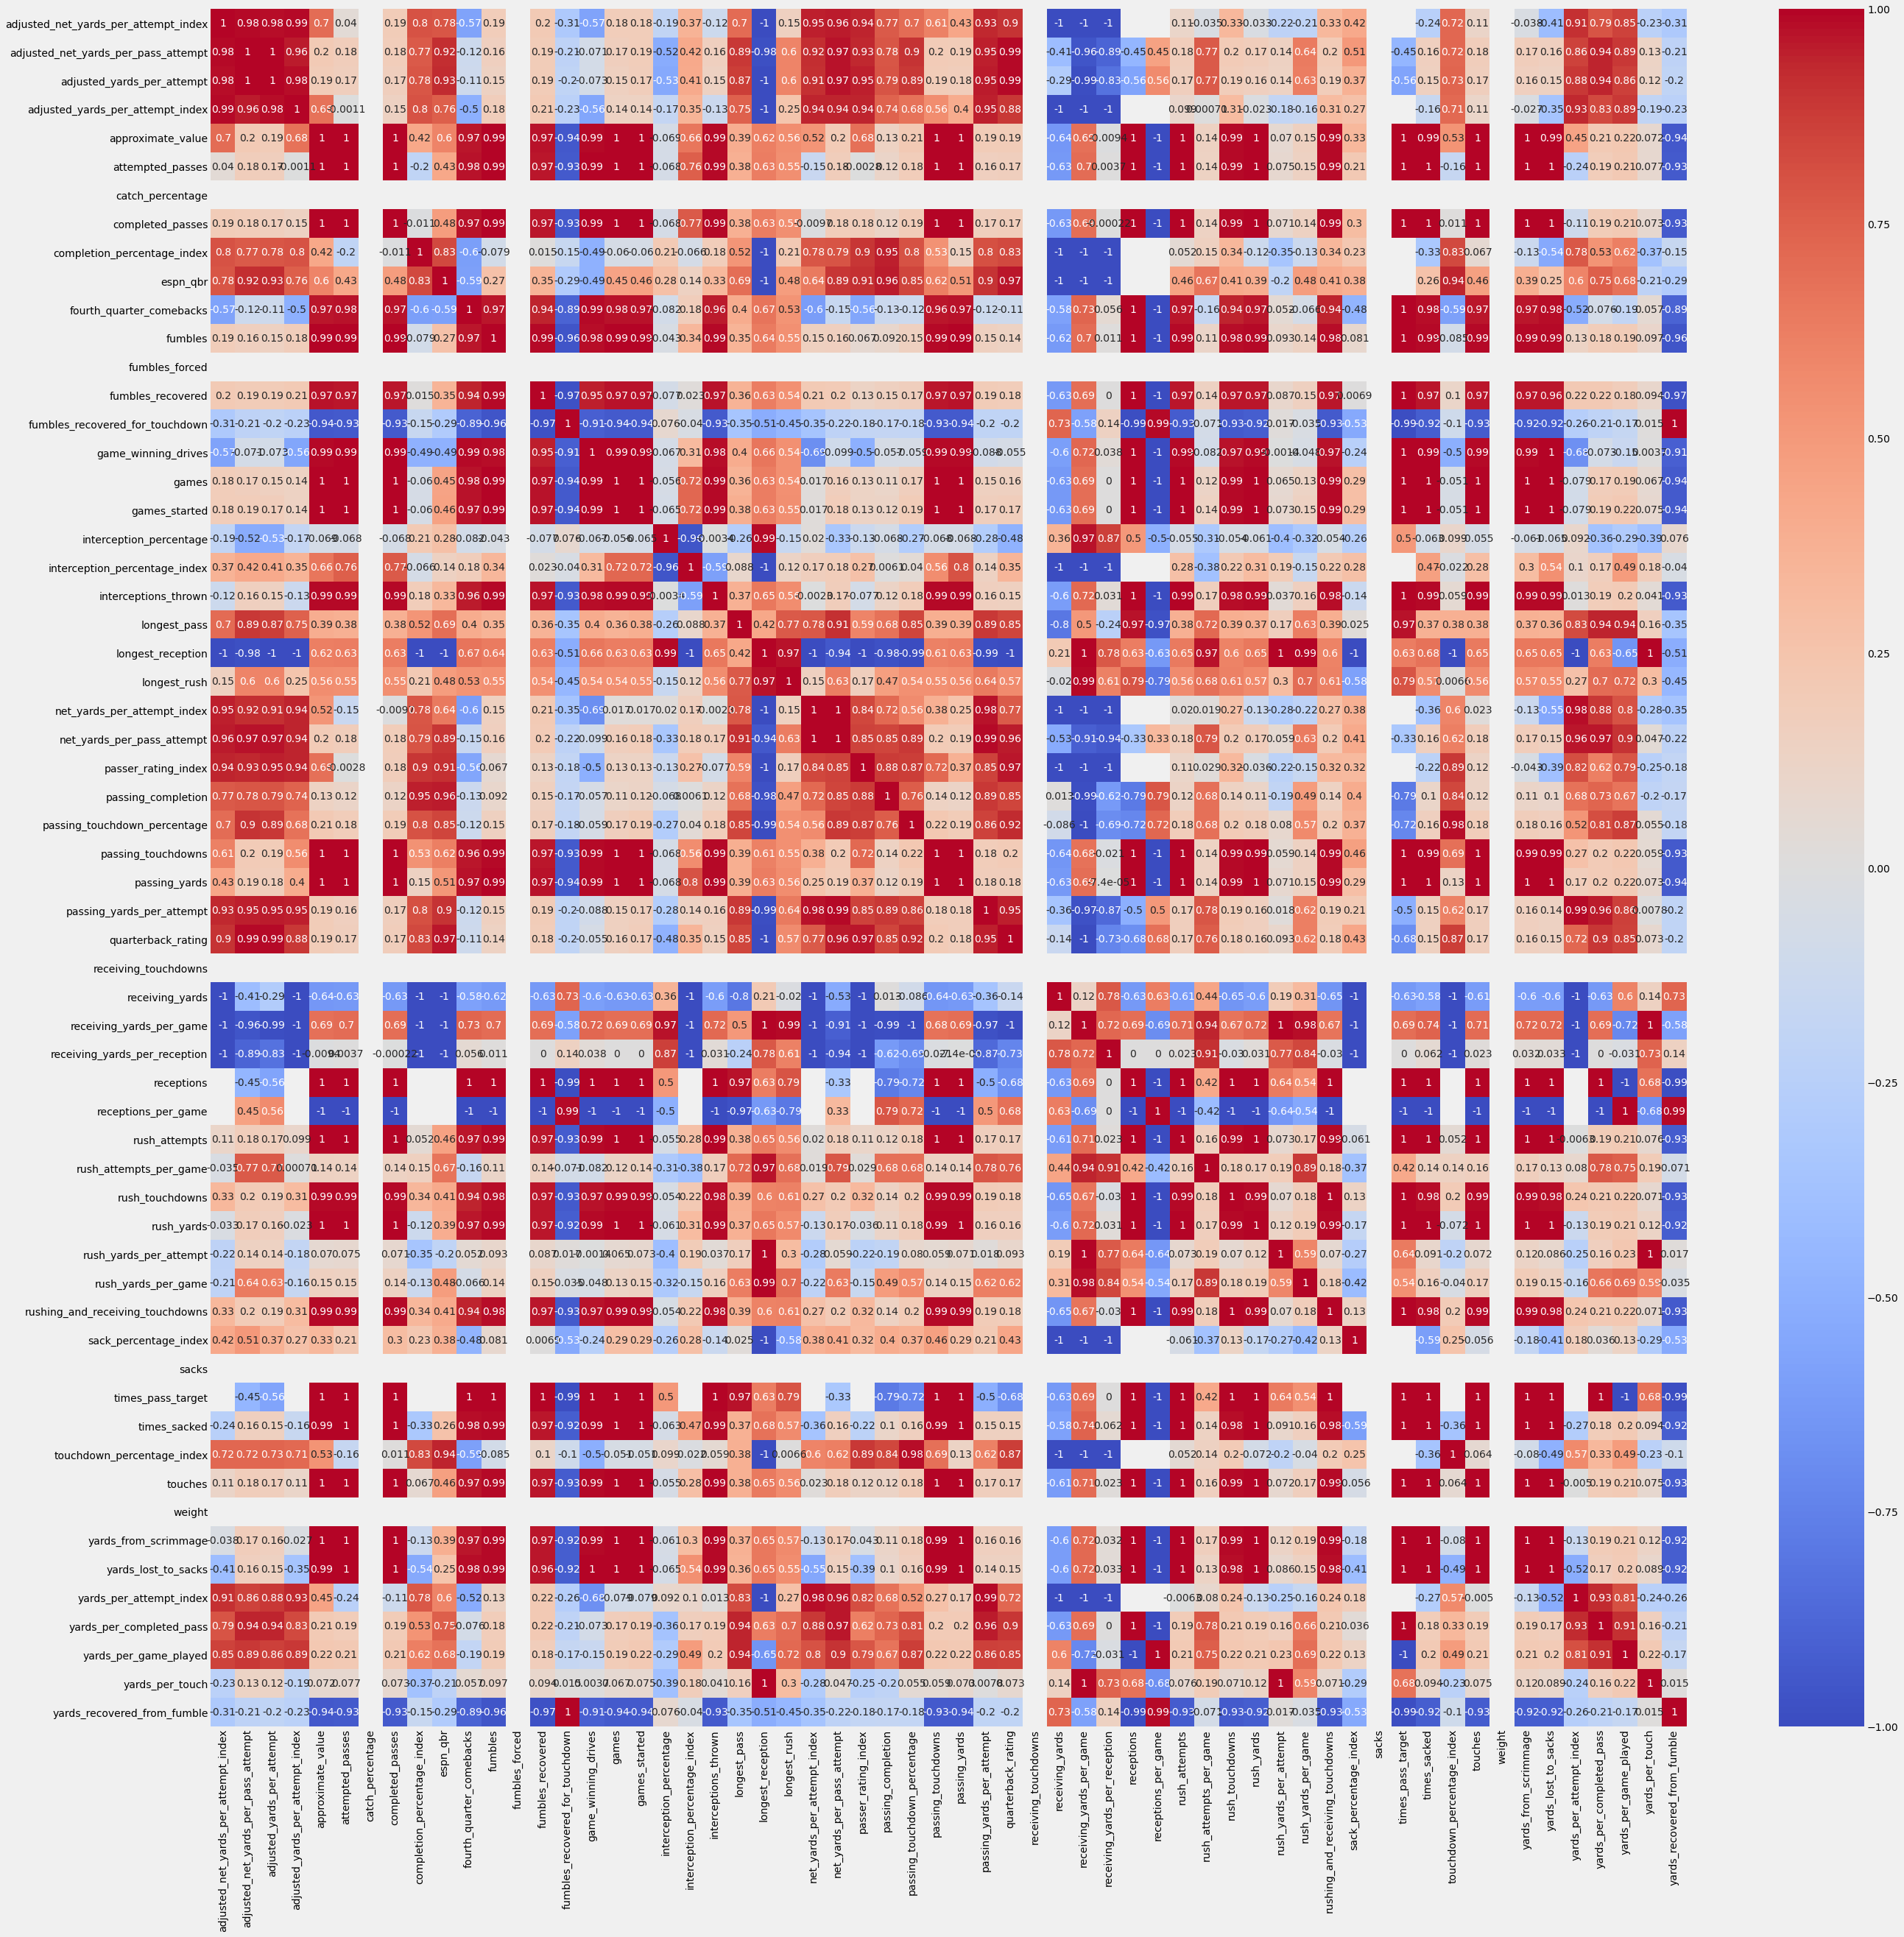

In [28]:
fig, ax = plt.subplots(figsize=(40,40))

sns.heatmap(rodge_corr, cmap='coolwarm', robust=True, annot=True, ax=ax)